<a href="https://colab.research.google.com/github/KomuravelliTharuni/NumberPrediction/blob/main/Number_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/KomuravelliTharuni/NumberPrediction.git
!git push -u origin main

Reinitialized existing Git repository in /content/.git/
fatal: pathspec 'README.md' did not match any files
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@1056538b9145.(none)')
error: remote origin already exists.
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/KomuravelliTharuni/NumberPrediction.git'


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9721 - loss: 0.0846 - val_accuracy: 0.9904 - val_loss: 0.0284
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9930 - loss: 0.0222 - val_accuracy: 0.9941 - val_loss: 0.0173
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9960 - loss: 0.0122 - val_accuracy: 0.9936 - val_loss: 0.0162
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9976 - loss: 0.0091 - val_accuracy: 0.9947 - val_loss: 0.0143
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9979 - loss: 0.0065 - val_accuracy: 0.9951 - val_loss: 0.0139
Actual digit: 4
Predicted: 3 or 9 (Confidence: 0.9123)


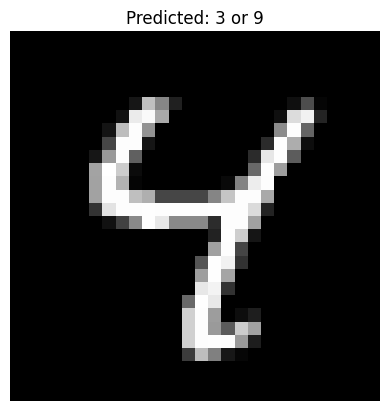

In [2]:
# CNN for Digit Classification (MNIST)
# This code builds a simple CNN to classify MNIST digits as either '3 or 9
#' or 'not 3 or 9'.
# It uses TensorFlow and Keras for model building and training.
# It also includes data preprocessing, model training, and prediction.

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Label: 1 if digit is 3 or 9, else 0
y_train_binary = np.isin(y_train, [4]).astype(np.float32)
y_test_binary = np.isin(y_test, [4]).astype(np.float32)

# 4. Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),          # Convert 28x28 to 784
    #   Flatten(input_shape=(28, 28)),          # To test other input sample
    Dense(64, activation='relu'), # Fully connected layer
    Dense(1, activation='sigmoid')          # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train model
model.fit(x_train, y_train_binary, epochs=5, validation_data=(x_test, y_test_binary))

# 6. Predict a sample
index = 6  # change index to test other digits
sample = x_test[index]
pred = model.predict(sample.reshape(1, 28, 28), verbose=0)
pred_class = int(pred[0][0] >= 0.5)

print(f"Actual digit: {y_test[index]}")
print(f"Predicted: {'3 or 9' if pred_class else 'Not 3 or 9'} (Confidence: {pred[0][0]:.4f})")

# 7. Show the image
plt.imshow(sample, cmap='gray')
plt.title(f"Predicted: {'3 or 9' if pred_class else 'Not 3 or 9'}")
plt.axis('off')
plt.show()